In [14]:
import geopandas as gpd
from matplotlib import pyplot as plt

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich



Text(0.5, 1.0, 'The whole world')

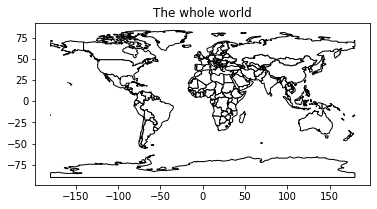

In [25]:
world_df = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
print(repr(world_df.crs))
world_df.plot(color='white', edgecolor='black')
plt.title('The whole world')

Text(0.5, 1.0, 'USA')

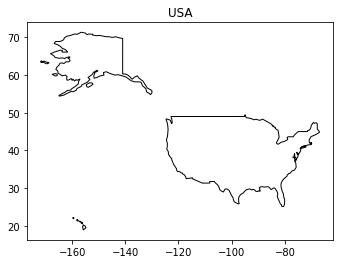

In [22]:
usa_df = world_df[world_df["iso_a3"] == 'USA']
usa_df.plot(color='white', edgecolor='black')
plt.title('USA')

In [23]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
tiles_df = gpd.read_file('output/covering_tiles.kml', driver='KML')
print(repr(tiles_df.crs))
print(tiles_df)

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

     Name Description                                           geometry
0                      POLYGON Z ((-120.28118 48.72093 0.00000, -118....
1                      POLYGON Z ((-119.67207 47.82260 0.00000, -118....
2                      POLYGON Z ((-119.71936 48.72091 0.00000, -118....
3                      POLYGON Z ((-113.43120 42.42690 0.00000, -112....
4                      POLYGON Z ((-112.21648 42.44624 0.00000, -110....
...   ...         ...                                                ...
1179                   POLYGON Z ((29.99818 -26.18805 0.00000, 31.096...
1180                   POLYGON Z ((136.08714 -34.33630 0.00000, 137.2...
1181                   POLYGON Z 

In [18]:
join = gpd.sjoin(tiles_df, usa_df, how="inner", op='intersects')
join_tiles = join[["Name", "geometry"]]
join_tiles = join_tiles.drop_duplicates()
print(len(join_tiles), 'tiles in join')

509 tiles in join


Text(0.5, 1.0, 'Tiles in the USA: 509')

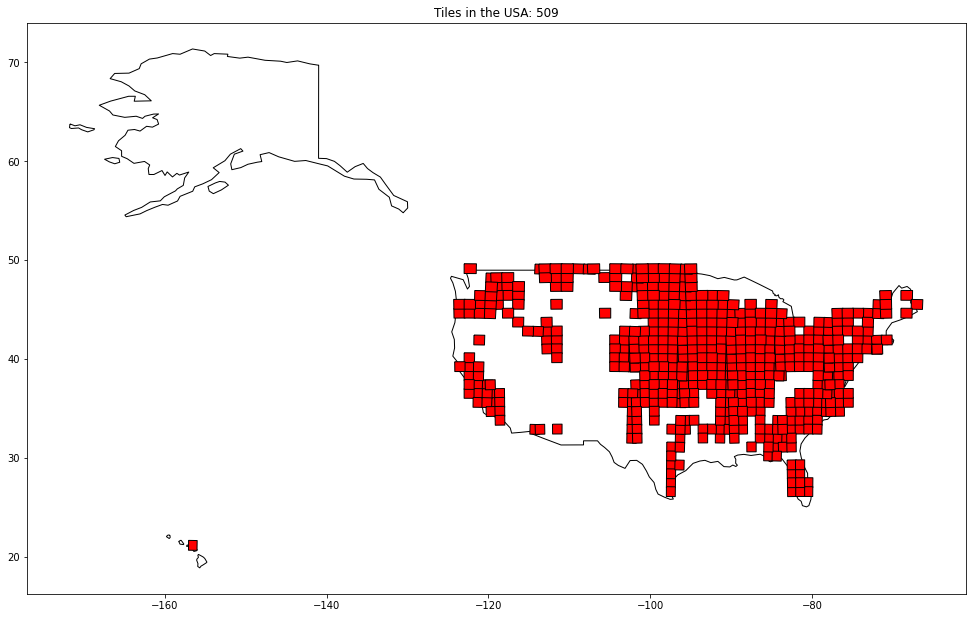

In [19]:
ax = usa_df.plot(color='white', edgecolor='black')
join_tiles.plot(color='red', edgecolor='black', ax=ax)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.title(f'Tiles in the USA: {len(join_tiles)}')